<a href="https://colab.research.google.com/github/Arnobzzz/seizureSense/blob/main/defense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mne numpy pandas matplotlib scipy
# You might also consider !pip install pyprep if you want advanced automated bad channel detection.


In [ ]:
!pip install pyprep

In [ ]:
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

# Mute MNE info messages to keep output clean, useful in production scripts
mne.set_log_level('WARNING')


In [ ]:
import os
import zipfile
from google.colab import drive


In [ ]:
pip install mne numpy pandas matplotlib scipy


In [ ]:
import mne
import os

# Replace with the actual path to your EDF file on Google Drive
file_path = r"/content/fn1.edf"

raw = mne.io.read_raw_edf(file_path, preload=True, verbose='WARNING')
print("Original channel names:")
print(raw.ch_names)

/tmp/ipython-input-23-1680710272.py:7: RuntimeWarning: Number of records from the header does not match the file size (perhaps the recording was not stopped before exiting). Inferring from the file size.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose='WARNING')
/tmp/ipython-input-23-1680710272.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose='WARNING')
/tmp/ipython-input-23-1680710272.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose='WARNING')


Original channel names:
['EEG Fp1', 'EEG Fp2', 'EEG F7', 'EEG F3', 'EEG Fz', 'EEG F4', 'EEG F8', 'EEG T3', 'EEG C3', 'EEG Cz', 'EEG C4', 'EEG T4', 'EEG T5', 'EEG P3', 'EEG Pz', 'EEG P4', 'EEG T6', 'EEG O1', 'EEG O2', 'EEG A1', 'EEG A2', 'EKG', 'MK']


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


In [ ]:
print(raw.annotations)


<Annotations | 5 segments: Closed Eyes (1), Open Eyes (4)>


In [ ]:
import mne
file_path = r'/content/fn1.edf'  # Replace with an actual EDF filename
raw = mne.io.read_raw_edf(file_path, preload=True, verbose='WARNING')
print("Channel names:")
print(raw.ch_names)
print("\nSampling frequency:", raw.info['sfreq'])
print("\nAnnotations summary:", raw.annotations)


Channel names:
['EEG Fp1', 'EEG Fp2', 'EEG F7', 'EEG F3', 'EEG Fz', 'EEG F4', 'EEG F8', 'EEG T3', 'EEG C3', 'EEG Cz', 'EEG C4', 'EEG T4', 'EEG T5', 'EEG P3', 'EEG Pz', 'EEG P4', 'EEG T6', 'EEG O1', 'EEG O2', 'EEG A1', 'EEG A2', 'EKG', 'MK']

Sampling frequency: 128.0

Annotations summary: <Annotations | 7 segments: Closed Eyes (3), Open Eyes (4)>


In [ ]:
raw.set_channel_types({'EKG': 'ecg', 'MK': 'misc'})  # or 'emg' if muscle


<RawEDF | fn1.edf, 23 x 44416 (347.0 s), ~7.8 MiB, data loaded>

In [ ]:
raw.drop_channels(['EKG', 'MK'])


<RawEDF | fn1.edf, 21 x 44416 (347.0 s), ~7.1 MiB, data loaded>

In [ ]:
montage = mne.channels.make_standard_montage('standard_1020')

# Rename channels to match montage (remove 'EEG ' prefix)
new_names = {ch: ch.replace('EEG ', '') for ch in raw.ch_names if ch.startswith('EEG ')}
raw.rename_channels(new_names)

raw.set_montage(montage)

<RawEDF | fn1.edf, 21 x 44416 (347.0 s), ~7.1 MiB, data loaded>

Channels after cleaning and montage setting:
['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2', 'A1', 'A2']


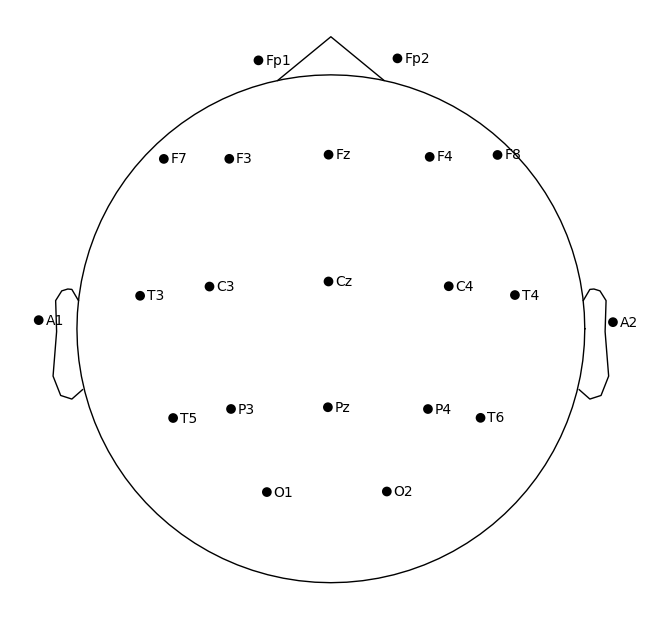

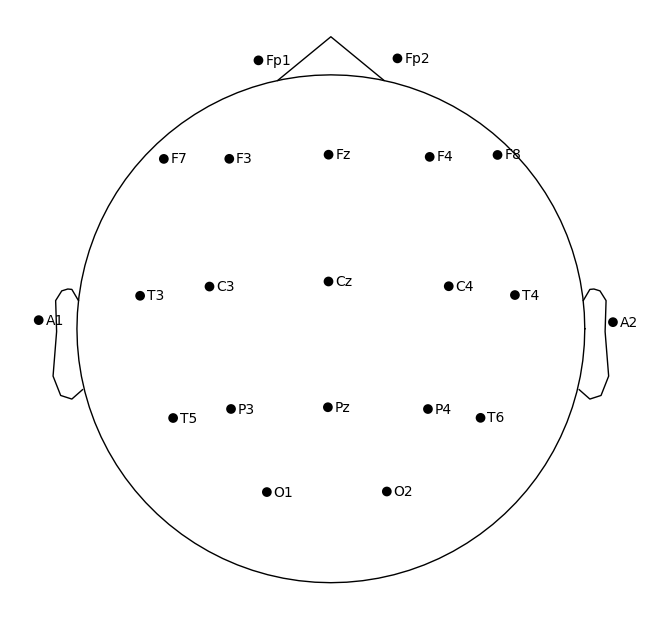

In [ ]:
import mne

file_path = r'/content/fn1.edf'  # Replace with your file

raw = mne.io.read_raw_edf(file_path, preload=True, verbose='WARNING')

# Remove 'EEG ' prefix
new_names = {ch: ch.replace('EEG ', '') for ch in raw.ch_names if ch.startswith('EEG ')}
raw.rename_channels(new_names)

# Set non-EEG channel types properly
raw.set_channel_types({'EKG': 'ecg', 'MK': 'misc'})

# Drop non-EEG channels if not needed for your analysis
raw.drop_channels(['EKG', 'MK'])

# Now set the standard 10-20 montage
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)

print("Channels after cleaning and montage setting:")
print(raw.ch_names)

# Optional: plot sensor locations to verify
raw.plot_sensors(kind='topomap', show_names=True)


In [ ]:
!pip install python-picard


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-picard: filename=python_picard-0.8-py3-none-any.whl size=16394 sha256=934c276ab73a73f3d4bab136572f28f8350bf3a16fe8e25c26209b00cc013980
  Stored in directory: /root/.cache/pip/wheels/86/7e/fc/6183c6bfdc791d9e7b5a1df84ec4f30055f76bc8414ab2300d
Successfully built python-picard


In [ ]:
ica = mne.preprocessing.ICA(n_components=0.99, random_state=97, method='picard')
ica.fit(raw, picks='eeg')


<ICA | raw data decomposition, method: picard (fit in 19 iterations on 44416 samples), 5 ICA components (21 PCA components available), channel types: eeg, no sources marked for exclusion>

In [ ]:
import os
import mne

file_path = r'/content/fn1.edf'  # Replace with your actual file

# Load raw data
raw = mne.io.read_raw_edf(file_path, preload=True, verbose='WARNING')

# Clean channel names (already done, but repeat to be safe)
new_names = {ch: ch.replace('EEG ', '') for ch in raw.ch_names if ch.startswith('EEG ')}
raw.rename_channels(new_names)

# Set non-EEG channel types and drop non-EEG channels
raw.set_channel_types({'EKG': 'ecg', 'MK': 'misc'})
raw.drop_channels(['EKG', 'MK'])

# Set standard 10-20 montage
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)

# Apply bandpass filter 1-45 Hz (zero-phase FIR filter)
raw.filter(l_freq=1.0, h_freq=45.0, fir_design='firwin')

# Re-reference to common average
raw.set_eeg_reference(ref_channels='average')

# Run ICA to remove artifacts
ica = mne.preprocessing.ICA(n_components=0.99, random_state=97, method='picard')
ica.fit(raw, picks='eeg')

# Automatically find EOG and muscle-related artifact components
eog_indices, eog_scores = ica.find_bads_eog(raw, ch_name='Fp1', threshold=1.5)
muscle_indices, muscle_scores = ica.find_bads_muscle(raw, threshold=1.5)
ica.exclude = list(set(eog_indices + muscle_indices))

# Apply ICA cleaning
ica.apply(raw)

# Create fixed-length epochs (e.g., 2 seconds)
epoch_length = 2.0
events = mne.make_fixed_length_events(raw, id=1, duration=epoch_length, overlap=0.0)
epochs = mne.Epochs(raw, events, event_id=1, tmin=0, tmax=epoch_length - 1/raw.info['sfreq'], baseline=None, preload=True)

print(f"Created {len(epochs)} epochs")

# Save preprocessed epochs for later analysis
save_path = file_path.replace('.edf', '-epo.fif')
epochs.save(save_path, overwrite=True)
print(f"Saved preprocessed epochs to {save_path}")


Created 604 epochs
Saved preprocessed epochs to /content/fn1-epo.fif


In [ ]:
import mne

file_path = r'/content/fn1.edf'  # Your raw EDF file path

# Load raw EDF
raw = mne.io.read_raw_edf(file_path, preload=True, verbose='WARNING')

# Preprocessing steps (clean channel names, montage, filter, ICA) as before
new_names = {ch: ch.replace('EEG ', '') for ch in raw.ch_names if ch.startswith('EEG ')}
raw.rename_channels(new_names)
raw.set_channel_types({'EKG': 'ecg', 'MK': 'misc'})
raw.drop_channels(['EKG', 'MK'])
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)
raw.filter(l_freq=1.0, h_freq=45.0, fir_design='firwin')
raw.set_eeg_reference(ref_channels='average')

ica = mne.preprocessing.ICA(n_components=0.99, random_state=97, method='picard')
ica.fit(raw, picks='eeg')
eog_inds, _ = ica.find_bads_eog(raw, ch_name='Fp1', threshold=1.5)
muscle_inds, _ = ica.find_bads_muscle(raw, threshold=1.5)
ica.exclude = list(set(eog_inds + muscle_inds))
ica.apply(raw)

# Create fixed-length epochs (2 seconds)
epoch_length = 2.0
events = mne.make_fixed_length_events(raw, id=1, duration=epoch_length, overlap=0.0)
epochs = mne.Epochs(raw, events, event_id=1, tmin=0, tmax=epoch_length - 1/raw.info['sfreq'], baseline=None, preload=True)

# Save epochs to FIF file
epochs_file = file_path.replace('.edf', '-epo.fif')
epochs.save(epochs_file, overwrite=True)
print(f"Epochs saved to {epochs_file}")


Epochs saved to /content/fn1-epo.fif


In [ ]:
import numpy as np
import pandas as pd
import mne

# Load epochs FIF file (created above)
epochs_file = r'/content/fn1-epo.fif'  # Use the saved epochs FIF file path
epochs = mne.read_epochs(epochs_file, preload=True)

# Load original raw EDF to access annotations
raw_file = r'/content/fn1.edf'
raw = mne.io.read_raw_edf(raw_file, preload=True, verbose='WARNING')

# Extract annotations and label epochs (use code from previous step)
# ...


In [ ]:
import mne
import numpy as np
import pandas as pd
import os
from scipy.signal import welch
import collections

# Define the bandpower function (moved here for clarity)
def bandpower(data, sf, band, window_sec=None):
    low, high = band
    nperseg = int(window_sec * sf) if window_sec else min(256, len(data))
    if nperseg > len(data):
        nperseg = len(data)  # avoid warning by adjusting nperseg
    freqs, psd = welch(data, sf, nperseg=nperseg)
    idx_band = np.logical_and(freqs >= low, freqs <= high)
    return np.trapezoid(psd[idx_band], freqs[idx_band])

# === Part 1: Load, preprocess, epoch, and save ===

def preprocess_and_epoch(raw_edf_path, epoch_duration=2.0, overlap=0.0):
    print(f"Processing file: {raw_edf_path}")

    # Load raw EDF
    raw = mne.io.read_raw_edf(raw_edf_path, preload=True, verbose='WARNING')

    # Clean channel names
    new_names = {ch: ch.replace('EEG ', '') for ch in raw.ch_names if ch.startswith('EEG ')}
    raw.rename_channels(new_names)

    # Set non-EEG channel types and drop them
    raw.set_channel_types({'EKG': 'ecg', 'MK': 'misc'})
    raw.drop_channels(['EKG', 'MK'])

    # Set montage
    montage = mne.channels.make_standard_montage('standard_1020')
    raw.set_montage(montage)

    # Filter 1-45 Hz
    raw.filter(l_freq=1.0, h_freq=45.0, fir_design='firwin')

    # Re-reference
    raw.set_eeg_reference(ref_channels='average')

    # ICA for artifact removal
    ica = mne.preprocessing.ICA(n_components=0.99, random_state=97, method='picard')
    ica.fit(raw, picks='eeg')
    eog_inds, _ = ica.find_bads_eog(raw, ch_name='Fp1', threshold=1.5)
    muscle_inds, _ = ica.find_bads_muscle(raw, threshold=1.5)
    ica.exclude = list(set(eog_inds + muscle_inds))
    ica.apply(raw)

    # Create fixed-length epochs
    events = mne.make_fixed_length_events(raw, id=1, duration=epoch_duration, overlap=overlap)
    epochs = mne.Epochs(raw, events, event_id=1, tmin=0, tmax=epoch_duration - 1/raw.info['sfreq'], baseline=None, preload=True)

    print(f"Created {len(epochs)} epochs")

    # Save epochs
    epochs_file = raw_edf_path.replace('.edf', '-epo.fif')
    epochs.save(epochs_file, overwrite=True)
    print(f"Saved epochs to {epochs_file}")

    return epochs_file, raw_edf_path

# === Part 2: Load epochs, extract annotations, label epochs, and extract features ===

def label_and_extract_features(epochs_file, raw_edf_path, target_labels, bands, window_sec):
    print(f"\nLoading epochs from: {epochs_file}")
    epochs = mne.read_epochs(epochs_file, preload=True)

    print(f"Loading raw EDF from: {raw_edf_path}")
    raw = mne.io.read_raw_edf(raw_edf_path, preload=True, verbose='WARNING')

    # Clean channel names and montage again (for annotations)
    new_names = {ch: ch.replace('EEG ', '') for ch in raw.ch_names if ch.startswith('EEG ')}
    raw.rename_channels(new_names)
    raw.set_channel_types({'EKG': 'ecg', 'MK': 'misc'})
    raw.drop_channels(['EKG', 'MK'])
    montage = mne.channels.make_standard_montage('standard_1020')
    raw.set_montage(montage)

    # Extract annotations as DataFrame
    annots = raw.annotations
    annot_df = pd.DataFrame({
        'onset': annots.onset,
        'duration': annots.duration,
        'description': annots.description
    })

    print("Annotations summary:")
    print(annot_df['description'].value_counts())

    # Label epochs based on overlap with target annotation labels
    labels = []
    epoch_times = epochs.events[:, 0] / epochs.info['sfreq']
    epoch_dur = epochs.tmax - epochs.tmin

    for start in epoch_times:
        end = start + epoch_dur
        overlap = False
        for _, row in annot_df.iterrows():
            annot_start = row['onset']
            annot_end = annot_start + row['duration']
            if row['description'] in target_labels:
                if (start < annot_end) and (end > annot_start):
                    overlap = True
                    break
        labels.append(1 if overlap else 0)

    labels = np.array(labels)
    print(f"Number of epochs labeled as target: {labels.sum()}")
    print(f"Number of epochs labeled as non-target: {len(labels) - labels.sum()}")

    # Extract features (bandpower)
    sfreq = epochs.info['sfreq']
    features = []
    for epoch_data in epochs.get_data():
        epoch_features = []
        for band in bands.values():
            bp = np.mean([bandpower(ch_data, sfreq, band, window_sec) for ch_data in epoch_data])
            epoch_features.append(bp)
        features.append(epoch_features)

    features = np.array(features)
    print("Feature matrix shape:", features.shape)

    # Add labels to epochs metadata and save
    epochs.metadata = pd.DataFrame({'label': labels})
    labeled_epochs_file = epochs_file.replace('-epo.fif', '-epo-labeled.fif')
    epochs.save(labeled_epochs_file, overwrite=True)
    print(f"Saved labeled epochs to {labeled_epochs_file}")

    return features, labels, labeled_epochs_file

# === Example usage ===

# Replace with your actual EDF file path
edf_file_path = r'/content/fn1.edf'

# Step 1: Preprocess and epoch
epochs_file, raw_file = preprocess_and_epoch(edf_file_path, epoch_duration=2.0, overlap=0.0)

# Step 2: Define your target annotation labels (e.g., seizure labels)
target_annotation_labels = ['Seizure', 'Ictal']  # Update based on your annotation descriptions

# Step 3: Define bands for feature extraction
bands = {'delta': (0.5, 4), 'theta': (4, 8), 'alpha': (8, 13), 'beta': (13, 30)}
epoch_duration = 2.0 # Match epoching duration
window_sec = epoch_duration

# Step 4: Label epochs and extract features
features, labels, labeled_epochs_file = label_and_extract_features(epochs_file, raw_file, target_annotation_labels, bands, window_sec)

# Now you have 'features' (numpy array) and 'labels' (numpy array)
print("\nLabels array shape:", labels.shape)
print(f"Number of target samples: {np.sum(labels)}")
print(f"Number of non-target samples: {len(labels) - np.sum(labels)}")

Processing file: /content/fn1.edf
Created 604 epochs
Saved epochs to /content/fn1-epo.fif

Loading epochs from: /content/fn1-epo.fif
Loading raw EDF from: /content/fn1.edf
Annotations summary:
description
Closed Eyes                                                                         5
Open Eyes                                                                           4
System.Collections.Generic.List`1[System.Tuple`2[System.Single.System.DateTime]]    1
Photic Stimulation                                                                  1
Sleep                                                                               1
Name: count, dtype: int64
Number of epochs labeled as target: 0
Number of epochs labeled as non-target: 604
Feature matrix shape: (604, 4)
Saved labeled epochs to /content/fn1-epo-labeled.fif

Labels array shape: (604,)
Number of target samples: 0
Number of non-target samples: 604


In [ ]:
events, event_id = mne.events_from_annotations(raw)
print(event_id)


{np.str_('Closed Eyes'): 1, np.str_('Open Eyes'): 2, np.str_('Photic Stimulation'): 3, np.str_('Sleep'): 4, np.str_('System.Collections.Generic.List`1[System.Tuple`2[System.Single.System.DateTime]]'): 5}


In [ ]:
desired_epoch_length = 2.0 # Define the desired epoch length

epochs = mne.Epochs(raw, events, event_id=event_id, tmin=0, tmax=desired_epoch_length, baseline=None, preload=True)

In [ ]:
desired_epoch_length = 2.0

# Without baseline correction
epochs = mne.Epochs(raw, events, event_id=event_id, tmin=0, tmax=desired_epoch_length, baseline=None, preload=True)

# Or with baseline correction on first 200 ms
# epochs = mne.Epochs(raw, events, event_id=event_id, tmin=0, tmax=desired_epoch_length, baseline=(0, 0.2), preload=True)


In [ ]:
print(epochs)


<Epochs | 12 events (all good), 0 – 2 s (baseline off), ~577 KiB, data loaded,
 np.str_('Closed Eyes'): 5
 np.str_('Open Eyes'): 4
 np.str_('Photic Stimulation'): 1
 np.str_('Sleep'): 1
 np.str_('System.Collections.Generic.List`1[System.Tuple`2[System.Single.System.DateTime]]'): 1>


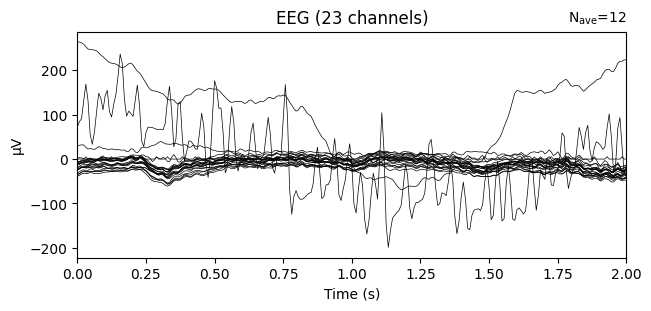

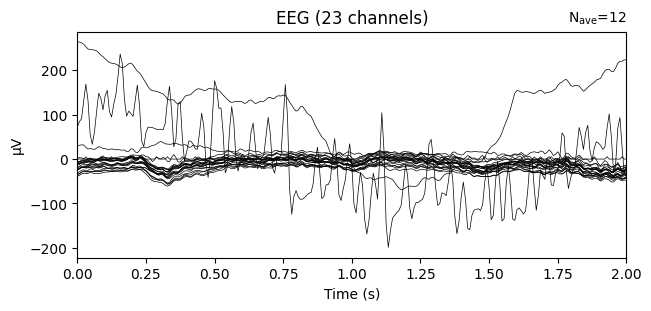

In [ ]:
epochs.average().plot()


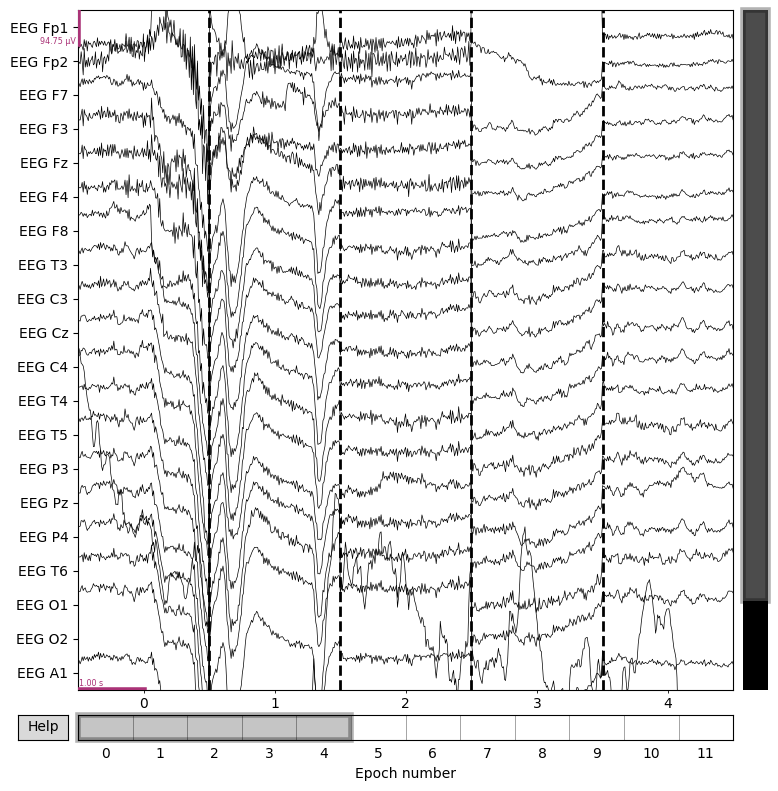

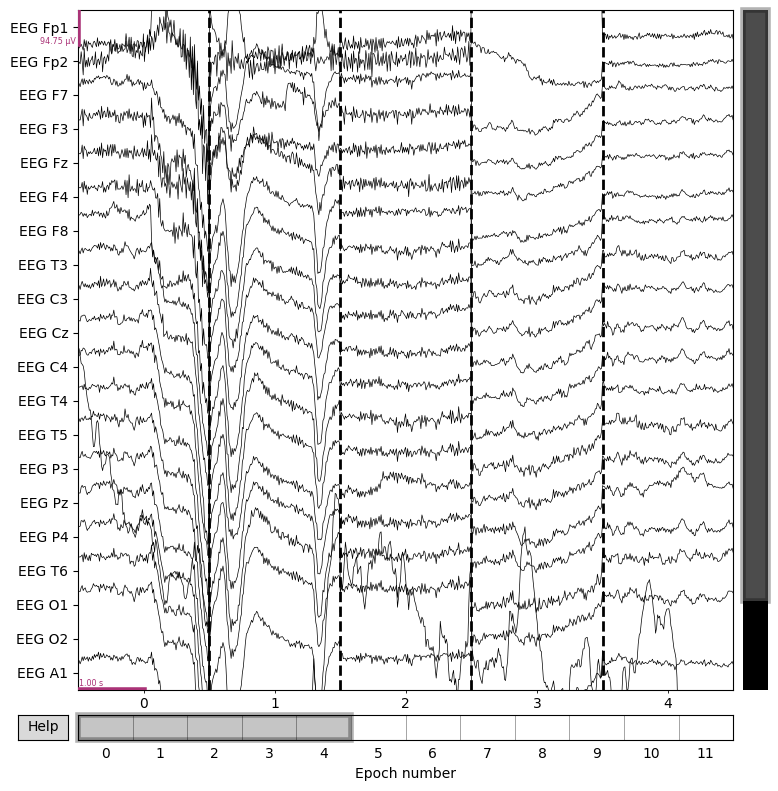

In [ ]:
epochs.plot(n_epochs=5, n_channels=20, scalings='auto')


In [ ]:
print(f"Number of epochs after rejection: {len(epochs)}")


Number of epochs after rejection: 12


In [ ]:
epochs = mne.Epochs(raw, events, event_id=event_id, tmin=0, tmax=2.0, baseline=(0, 0.2), preload=True)


In [ ]:
epochs = mne.Epochs(raw, events, event_id=event_id, tmin=0, tmax=2.0, baseline=None, preload=True, reject=None)


In [ ]:
import collections

event_counts = collections.Counter([raw.annotations.description[i] for i in range(len(raw.annotations))])
print("Annotation counts:")
print(event_counts)


Annotation counts:
Counter({np.str_('Closed Eyes'): 5, np.str_('Open Eyes'): 4, np.str_('System.Collections.Generic.List`1[System.Tuple`2[System.Single.System.DateTime]]'): 1, np.str_('Photic Stimulation'): 1, np.str_('Sleep'): 1})


In [ ]:
epoch_length = 2.0  # seconds
events = mne.make_fixed_length_events(raw, id=1, duration=epoch_length)
epochs = mne.Epochs(raw, events, tmin=0, tmax=epoch_length - 1/raw.info['sfreq'], baseline=None, preload=True)
print(f"Created {len(epochs)} fixed-length epochs")


Created 604 fixed-length epochs


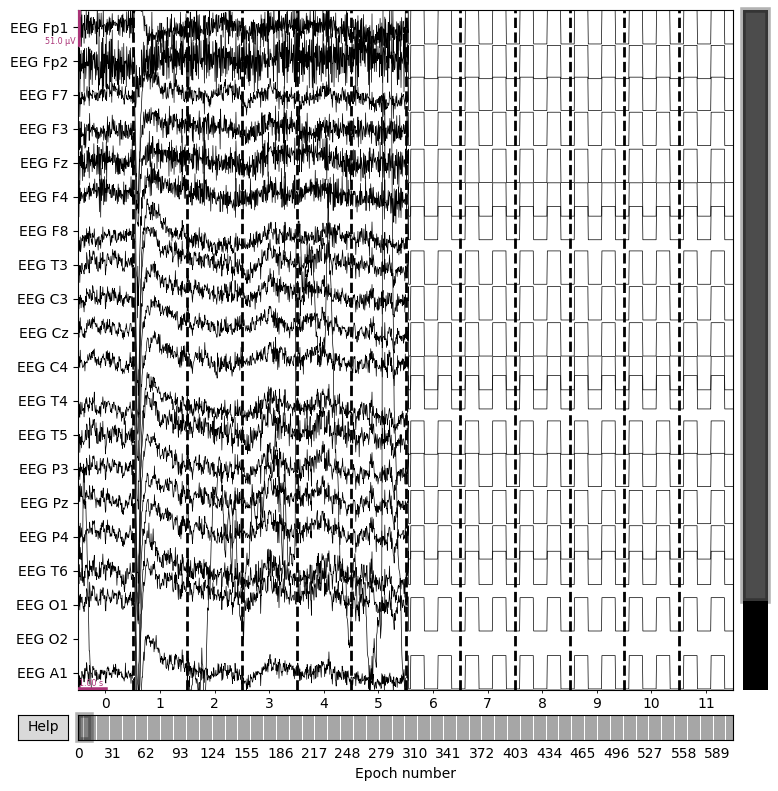

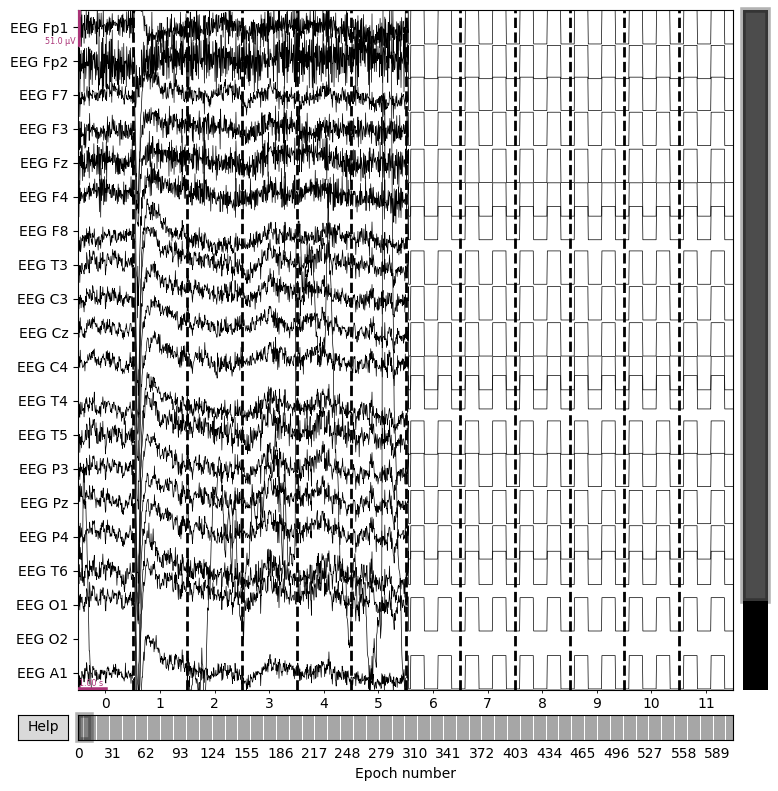

In [ ]:
epochs.plot(n_epochs=12, n_channels=20, scalings='auto')


In [ ]:
import numpy as np
import pandas as pd

# Convert annotations to DataFrame
annot_df = pd.DataFrame({
    'onset': raw.annotations.onset,
    'duration': raw.annotations.duration,
    'description': raw.annotations.description
})

def label_epochs(epochs, annot_df, target_labels):
    labels = []
    epoch_starts = epochs.events[:, 0] / epochs.info['sfreq']
    epoch_duration = epochs.tmax - epochs.tmin
    for start in epoch_starts:
        end = start + epoch_duration
        overlap = False
        for _, row in annot_df.iterrows():
            if row['description'] in target_labels:
                annot_start = row['onset']
                annot_end = annot_start + row['duration']
                if (start < annot_end) and (end > annot_start):
                    overlap = True
                    break
        labels.append(1 if overlap else 0)
    return np.array(labels)

# Example: label epochs with 'Closed Eyes' as target
target_labels = ['Closed Eyes']
epoch_labels = label_epochs(epochs, annot_df, target_labels)

print(f"Number of target epochs: {np.sum(epoch_labels)}")
print(f"Number of non-target epochs: {len(epoch_labels) - np.sum(epoch_labels)}")


Number of target epochs: 5
Number of non-target epochs: 599


In [ ]:
import numpy as np

def bandpower(data, sf, band, window_sec=None):
    from scipy.signal import welch
    low, high = band
    nperseg = window_sec * sf if window_sec else 4 * sf
    freqs, psd = welch(data, sf, nperseg=int(nperseg))
    idx_band = np.logical_and(freqs >= low, freqs <= high)
    return np.trapz(psd[idx_band], freqs[idx_band])

sfreq = epochs.info['sfreq']
bands = {'delta': (0.5, 4), 'theta': (4, 8), 'alpha': (8, 13), 'beta': (13, 30)}

features = []
for epoch in epochs.get_data():
    epoch_features = []
    for band in bands.values():
        # Average bandpower across all channels
        bp = np.mean([bandpower(ch_data, sfreq, band) for ch_data in epoch])
        epoch_features.append(bp)
    features.append(epoch_features)

features = np.array(features)
print("Feature matrix shape:", features.shape)


/usr/local/lib/python3.11/dist-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 512 is greater than input length  = 256, using nperseg = 256
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/tmp/ipython-input-50-1528948208.py:9: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(psd[idx_band], freqs[idx_band])
/tmp/ipython-input-50-1528948208.py:9: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(psd[idx_band], freqs[idx_band])
/usr/local/lib/python3.11/dist-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 512 is greater than input length  = 256, using nperseg = 256
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/tmp/ipython-input-50-1528948208.py:9: DeprecationWarning: `trapz` is deprecated. Use `tra

Feature matrix shape: (604, 4)


In [ ]:
import numpy as np
from scipy.signal import welch

def bandpower(data, sf, band, window_sec=None):
    low, high = band
    nperseg = int(window_sec * sf) if window_sec else min(256, len(data))
    if nperseg > len(data):
        nperseg = len(data)  # avoid warning by adjusting nperseg
    freqs, psd = welch(data, sf, nperseg=nperseg)
    idx_band = np.logical_and(freqs >= low, freqs <= high)
    return np.trapezoid(psd[idx_band], freqs[idx_band])


In [ ]:
sfreq = epochs.info['sfreq']
bands = {'delta': (0.5, 4), 'theta': (4, 8), 'alpha': (8, 13), 'beta': (13, 30)}
window_sec = epochs.tmax - epochs.tmin  # epoch length in seconds

# Feature extraction is now handled in the labeling function
# features = []
# for epoch in epochs.get_data():
#     epoch_features = []
#     for band in bands.values():
#         # Average bandpower across all channels
#         bp = np.mean([bandpower(ch_data, sfreq, band, window_sec) for ch_data in epoch])
#         epoch_features.append(bp)
#     features.append(epoch_features)

# features = np.array(features)
# print("Feature matrix shape:", features.shape)

In [ ]:
# This cell is now redundant and has been incorporated into cell 4l4ozDRSroAF

In [ ]:
import pandas as pd

df_features = pd.DataFrame(features, columns=bands.keys())
df_features['label'] = labels

# Save to CSV for easy loading later
df_features.to_csv('processed_eeg_features.csv', index=False)
print("Saved features and labels to 'processed_eeg_features.csv'")


Saved features and labels to 'processed_eeg_features.csv'


In [ ]:
import mne

def load_and_preprocess(raw_file_path):
    # Load raw EDF file
    raw = mne.io.read_raw_edf(raw_file_path, preload=True, verbose='WARNING')

    # Clean channel names (remove 'EEG ' prefix if present)
    new_names = {ch: ch.replace('EEG ', '') for ch in raw.ch_names if ch.startswith('EEG ')}
    raw.rename_channels(new_names)

    # Set channel types for non-EEG channels and drop them
    raw.set_channel_types({'EKG': 'ecg', 'MK': 'misc'})
    raw.drop_channels(['EKG', 'MK'])

    # Set standard 10-20 montage
    montage = mne.channels.make_standard_montage('standard_1020')
    raw.set_montage(montage)

    # Bandpass filter (1-45 Hz)
    raw.filter(l_freq=1.0, h_freq=45.0, fir_design='firwin')

    # Re-reference to average
    raw.set_eeg_reference(ref_channels='average')

    # Run ICA to remove artifacts
    ica = mne.preprocessing.ICA(n_components=0.99, random_state=97, method='picard')
    ica.fit(raw, picks='eeg')

    # Find artifact components (EOG and muscle)
    eog_inds, _ = ica.find_bads_eog(raw, ch_name='Fp1', threshold=1.5)
    muscle_inds, _ = ica.find_bads_muscle(raw, threshold=1.5)
    ica.exclude = list(set(eog_inds + muscle_inds))

    # Apply ICA cleaning
    ica.apply(raw)

    return raw


In [ ]:
raw_file = '/content/fn1.edf'  # Replace with your EDF file path

# 1. Load and preprocess EEG data
raw = load_and_preprocess(raw_file)

# 2. Create fixed-length epochs (e.g., 2 seconds, 50% overlap)
epoch_length = 2.0
overlap = 1.0  # seconds
events = mne.make_fixed_length_events(raw, id=1, duration=epoch_length, overlap=overlap)
epochs = mne.Epochs(raw, events, event_id=1, tmin=0, tmax=epoch_length - 1/raw.info['sfreq'], baseline=None, preload=True)

print(f"Created {len(epochs)} epochs")

# 3. Proceed with feature extraction, labeling, and classification


Created 1207 epochs


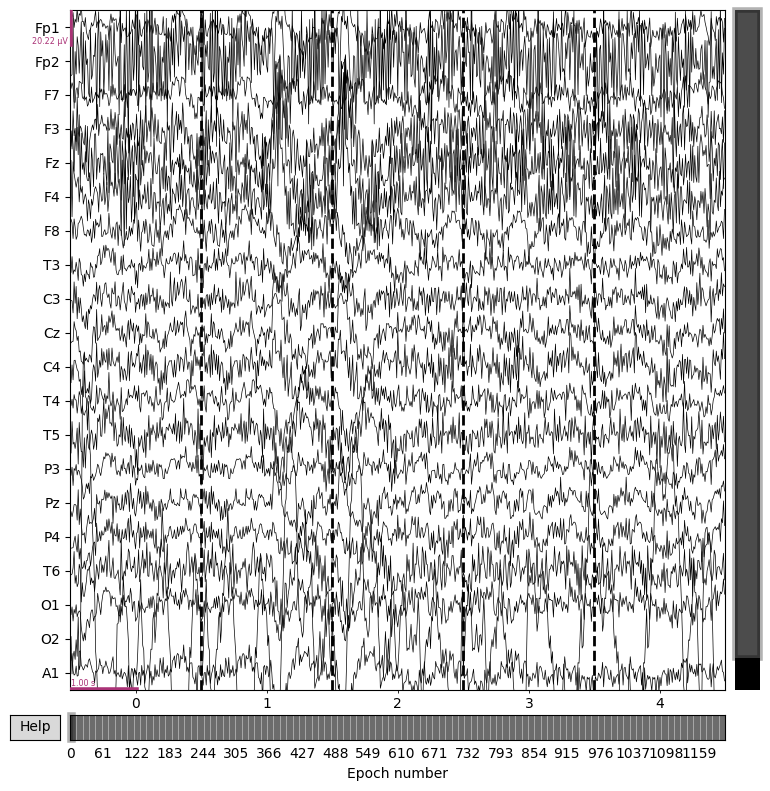

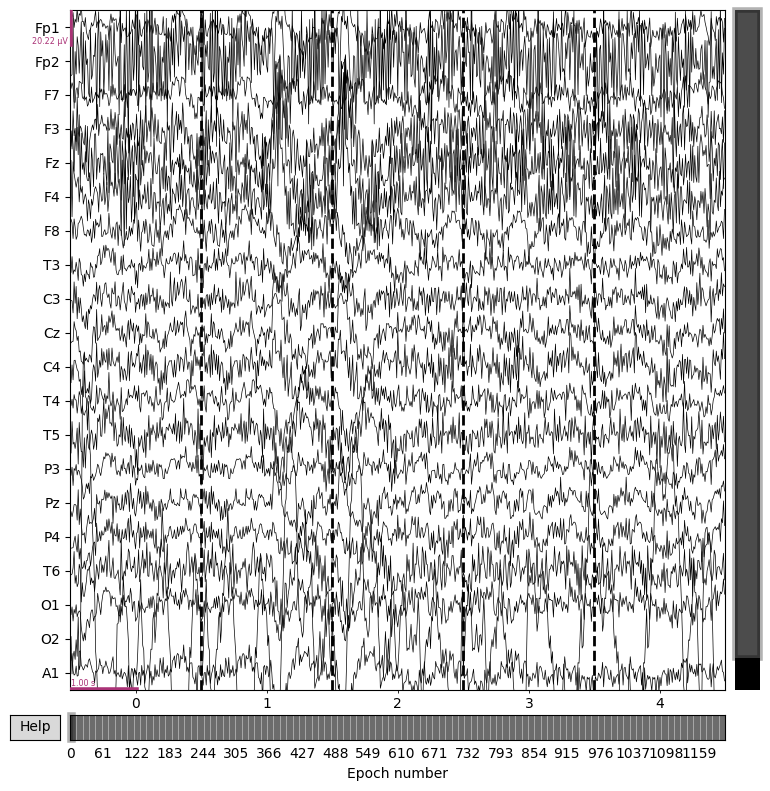

In [ ]:
# Plot a few epochs
epochs.plot(n_epochs=5, n_channels=20, scalings='auto')

In [ ]:
import gdown
import os
import zipfile

file_id = '1qgmbC9cB0mBsO4g26K1oVTv_2hot2q3R'
url = f'https://drive.google.com/uc?id={file_id}'
output_zip = 'dataset.zip'

gdown.download(url, output_zip, quiet=False)

extract_path = './adora_real_dataset/'
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(output_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Extracted ZIP contents to: {extract_path}")
print("Top-level files and folders in extracted directory:")
print(os.listdir(extract_path))


Downloading...
From (original): https://drive.google.com/uc?id=1qgmbC9cB0mBsO4g26K1oVTv_2hot2q3R
From (redirected): https://drive.google.com/uc?id=1qgmbC9cB0mBsO4g26K1oVTv_2hot2q3R&confirm=t&uuid=18f4c98a-2eec-43d8-9187-d2f6e1b9940f
To: /content/dataset.zip
100%|██████████| 906M/906M [00:19<00:00, 45.8MB/s]


Extracted ZIP contents to: ./adora_real_dataset/
Top-level files and folders in extracted directory:
['adora real']


In [61]:
import mne
from tqdm import tqdm  # Progress bar

# Step 6: Recursively find all EDF files inside the extracted folder
edf_files = []
for root, dirs, files in os.walk(extract_path):
    for file in files:
        if file.lower().endswith('.edf'):
            edf_files.append(os.path.join(root, file))

print(f"Total EDF files found: {len(edf_files)}")

# Step 7: Define preprocessing function
def load_and_preprocess(raw_file_path):
    raw = mne.io.read_raw_edf(raw_file_path, preload=True, verbose='WARNING')
    new_names = {ch: ch.replace('EEG ', '') for ch in raw.ch_names if ch.startswith('EEG ')}
    raw.rename_channels(new_names)
    raw.set_channel_types({'EKG': 'ecg', 'MK': 'misc'})
    raw.drop_channels(['EKG', 'MK'])
    montage = mne.channels.make_standard_montage('standard_1020')
    raw.set_montage(montage)
    raw.filter(l_freq=1.0, h_freq=45.0, fir_design='firwin')
    raw.set_eeg_reference(ref_channels='average')
    ica = mne.preprocessing.ICA(n_components=0.99, random_state=97, method='picard')
    ica.fit(raw, picks='eeg')
    eog_inds, _ = ica.find_bads_eog(raw, ch_name='Fp1', threshold=1.5)
    muscle_inds, _ = ica.find_bads_muscle(raw, threshold=1.5)
    ica.exclude = list(set(eog_inds + muscle_inds))
    ica.apply(raw)
    return raw

# Step 8: Define epoching function
def create_epochs(raw, epoch_length=2.0, overlap=1.0):
    events = mne.make_fixed_length_events(raw, id=1, duration=epoch_length, overlap=overlap)
    epochs = mne.Epochs(raw, events, event_id=1, tmin=0,
                        tmax=epoch_length - 1/raw.info['sfreq'], baseline=None, preload=True)
    return epochs

# Step 9: Create output folder for epochs
output_folder = os.path.join(extract_path, 'processed_epochs')
os.makedirs(output_folder, exist_ok=True)

# Step 10: Batch process all EDF files with progress bar
for edf_path in tqdm(edf_files, desc="Processing EDF files"):
    try:
        raw = load_and_preprocess(edf_path)
        epochs = create_epochs(raw, epoch_length=2.0, overlap=1.0)
        base_name = os.path.basename(edf_path).replace('.edf', '-epo.fif')
        save_path = os.path.join(output_folder, base_name)
        epochs.save(save_path, overwrite=True)
    except Exception as e:
        print(f"Failed to process {edf_path}: {e}")

print("Batch preprocessing and epoching completed.")


Total EDF files found: 212


Processing EDF files:  67%|██████▋   | 142/212 [40:23<14:14, 12.21s/it]

Failed to process ./adora_real_dataset/adora real/sust/mn31.edf: One PCA component captures most of the explained variance (99.85086654306106%), your threshold results in 1 component. You should select a higher value.


Processing EDF files:  98%|█████████▊| 207/212 [57:22<00:53, 10.67s/it]

Failed to process ./adora_real_dataset/adora real/sust/mn23.edf: One PCA component captures most of the explained variance (99.49267379127825%), your threshold results in 1 component. You should select a higher value.


Processing EDF files: 100%|██████████| 212/212 [58:10<00:00, 16.47s/it]

Batch preprocessing and epoching completed.


In [62]:
import os
import pandas as pd
import mne
import numpy as np
from tqdm import tqdm

# Path to your epoch files
epochs_folder = os.path.join(extract_path, 'processed_epochs')

epoch_files = [os.path.join(epochs_folder, f) for f in os.listdir(epochs_folder) if f.endswith('-epo.fif')]

bands = {'delta': (0.5, 4), 'theta': (4, 8), 'alpha': (8, 13), 'beta': (13, 30)}

def bandpower(data, sf, band):
    from scipy.signal import welch
    low, high = band
    freqs, psd = welch(data, sf, nperseg=256)
    idx_band = np.logical_and(freqs >= low, freqs <= high)
    return np.trapz(psd[idx_band], freqs[idx_band])

def get_label_from_filename(filename):
    # Extract prefix from filename (e.g., 'mn41-epo.fif' -> 'mn')
    prefix = os.path.basename(filename)[:2].lower()
    if prefix in ['mn', 'fn']:
        return 0  # Negative (no epilepsy)
    elif prefix in ['mp', 'fp']:
        return 1  # Positive (epileptic)
    else:
        raise ValueError(f"Unknown prefix in filename: {filename}")

def get_gender_from_filename(filename):
    prefix = os.path.basename(filename)[:2].lower()
    if prefix in ['mn', 'mp']:
        return 'male'
    elif prefix in ['fn', 'fp']:
        return 'female'
    else:
        return 'unknown'

features_list = []
labels_list = []
gender_list = []
file_list = []

for epo_file in tqdm(epoch_files, desc="Extracting features and labels"):
    epochs = mne.read_epochs(epo_file, preload=True)
    sfreq = epochs.info['sfreq']
    label = get_label_from_filename(epo_file)
    gender = get_gender_from_filename(epo_file)

    for epoch_data in epochs.get_data():
        feature_vector = []
        for band in bands.values():
            bp = np.mean([bandpower(ch, sfreq, band) for ch in epoch_data])
            feature_vector.append(bp)
        features_list.append(feature_vector)
        labels_list.append(label)
        gender_list.append(gender)
        file_list.append(os.path.basename(epo_file))

# Create DataFrame
df_features = pd.DataFrame(features_list, columns=bands.keys())
df_features['label'] = labels_list
df_features['gender'] = gender_list
df_features['file'] = file_list

print(df_features.head())


Streaming output truncated to the last 5000 lines.
/tmp/ipython-input-62-1437044018.py:19: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(psd[idx_band], freqs[idx_band])
/tmp/ipython-input-62-1437044018.py:19: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(psd[idx_band], freqs[idx_band])
/tmp/ipython-input-62-1437044018.py:19: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(psd[idx_band], freqs[idx_band])
/tmp/ipython-input-62-1437044018.py:19: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(psd[idx_band], freqs[idx_band])
/tmp/ipython-input-62-1437044018.py:19: Depre

          delta         theta         alpha          beta  label  gender  \
0  6.106468e-12  1.032802e-12  4.416485e-13  1.282701e-12      0  female   
1  3.703066e-12  1.919985e-12  1.354212e-12  2.821537e-12      0  female   
2  5.368933e-12  1.173970e-12  1.038099e-12  2.246782e-12      0  female   
3  6.063558e-12  1.312176e-12  1.587105e-12  2.287186e-12      0  female   
4  4.233612e-12  1.211072e-12  8.610492e-13  1.753092e-12      0  female   

          file  
0  fn7-epo.fif  
1  fn7-epo.fif  
2  fn7-epo.fif  
3  fn7-epo.fif  
4  fn7-epo.fif  


In [63]:
def bandpower(data, sf, band):
    from scipy.signal import welch
    low, high = band
    freqs, psd = welch(data, sf, nperseg=256)
    idx_band = np.logical_and(freqs >= low, freqs <= high)
    return np.trapezoid(psd[idx_band], freqs[idx_band])  # updated here


In [64]:
df_features.to_csv('features_with_labels.csv', index=False)


In [65]:
import pandas as pd

df = pd.read_csv('features_with_labels.csv')
print(df.head())


          delta         theta         alpha          beta  label  gender  \
0  6.106468e-12  1.032802e-12  4.416485e-13  1.282701e-12      0  female   
1  3.703066e-12  1.919985e-12  1.354212e-12  2.821537e-12      0  female   
2  5.368933e-12  1.173970e-12  1.038099e-12  2.246782e-12      0  female   
3  6.063558e-12  1.312176e-12  1.587105e-12  2.287186e-12      0  female   
4  4.233612e-12  1.211072e-12  8.610492e-13  1.753092e-12      0  female   

          file  
0  fn7-epo.fif  
1  fn7-epo.fif  
2  fn7-epo.fif  
3  fn7-epo.fif  
4  fn7-epo.fif  


In [66]:
# Make an explicit copy to avoid the warning
X = df[['delta', 'theta', 'alpha', 'beta']].copy()

# Now safely add the 'gender' column without warning
X['gender'] = df['gender'].map({'male': 0, 'female': 1})


In [68]:
from sklearn.model_selection import train_test_split

y = df['label'] # Define y as the label column

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           0       0.71      0.71      0.71     19023
           1       0.77      0.77      0.77     23569

    accuracy                           0.74     42592
   macro avg       0.74      0.74      0.74     42592
weighted avg       0.74      0.74      0.74     42592

ROC AUC Score: 0.8274789273392468


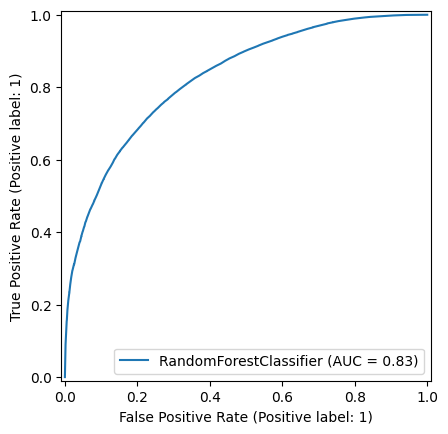

In [70]:
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()


# **2nd Session**

In [71]:
!pip install PyWavelets


In [72]:
import pywt
import numpy as np

def extract_dwt_features(epoch_data, wavelet='db4', level=4):
    """
    Extract DWT features from one epoch (channels x timepoints).
    Returns a feature vector with energy of coefficients at each level for all channels.
    """
    features = []
    for ch_data in epoch_data:
        coeffs = pywt.wavedec(ch_data, wavelet, level=level)
        # Calculate energy (sum of squared coefficients) for each level
        for c in coeffs:
            energy = np.sum(np.square(c))
            features.append(energy)
    return features


In [73]:
import os
import zipfile
import gdown

# Your Google Drive file ID from the link
file_id = '1qgmbC9cB0mBsO4g26K1oVTv_2hot2q3R'

# Construct the correct download URL
url = f'https://drive.google.com/uc?id={file_id}'

# Output file name
output_zip = 'dataset.zip'

# Download the file
gdown.download(url, output_zip, quiet=False)

# Extract the ZIP file
extract_path = './adora_real_dataset/'
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(output_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Extracted ZIP contents to: {extract_path}")
print("Top-level files and folders in extracted directory:")
print(os.listdir(extract_path))


Downloading...
From (original): https://drive.google.com/uc?id=1qgmbC9cB0mBsO4g26K1oVTv_2hot2q3R
From (redirected): https://drive.google.com/uc?id=1qgmbC9cB0mBsO4g26K1oVTv_2hot2q3R&confirm=t&uuid=2202762b-27f8-4f1f-82fe-171b61800ee5
To: /content/dataset.zip
100%|██████████| 906M/906M [00:21<00:00, 41.7MB/s]


Extracted ZIP contents to: ./adora_real_dataset/
Top-level files and folders in extracted directory:
['processed_epochs', 'adora real']


In [74]:
import zipfile

zip_path = 'dataset.zip'  # your downloaded ZIP file

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    file_list = zip_ref.namelist()
    print(f"Total files in ZIP archive: {len(file_list)}")
    # Optionally, print all file names
    # for f in file_list:
    #     print(f)


Total files in ZIP archive: 214


In [75]:
!pip install mne


In [76]:
import pywt
import numpy as np

def extract_dwt_features(epoch_data, wavelet='db4', level=4):
    features = []
    for ch_data in epoch_data:
        coeffs = pywt.wavedec(ch_data, wavelet, level=level)
        for c in coeffs:
            energy = np.sum(np.square(c))
            features.append(energy)
    return features


In [78]:
from tqdm import tqdm
import pandas as pd
import mne
import os

# Path to your epoch files
epochs_folder = os.path.join(extract_path, 'processed_epochs')
epoch_files = [os.path.join(epochs_folder, f) for f in os.listdir(epochs_folder) if f.endswith('-epo.fif')]

dwt_features_list = []

print("Extracting DWT features from epochs...")

for epo_file in tqdm(epoch_files, desc="DWT feature extraction"):
    epochs = mne.read_epochs(epo_file, preload=True)
    for epoch_data in epochs.get_data():
        dwt_feats = extract_dwt_features(epoch_data)
        dwt_features_list.append(dwt_feats)

# Convert to DataFrame
num_dwt_features = len(dwt_features_list[0])
dwt_columns = [f'dwt_feat_{i+1}' for i in range(num_dwt_features)]
df_dwt = pd.DataFrame(dwt_features_list, columns=dwt_columns)

print(df_dwt.head())


Extracting DWT features from epochs...


DWT feature extraction: 100%|██████████| 210/210 [04:58<00:00,  1.42s/it]


ValueError: 105 columns passed, passed data had 110 columns

In [79]:
!pip install mne PyWavelets

In [80]:
import pywt
import numpy as np
from tqdm import tqdm
import pandas as pd
import mne
import os
from collections import Counter

# Set the path to your extracted epochs folder
extract_path = '/content/adora_real_dataset'
epochs_folder = os.path.join(extract_path, 'processed_epochs')

# List all epoch files ending with '-epo.fif'
epoch_files = [os.path.join(epochs_folder, f) for f in os.listdir(epochs_folder) if f.endswith('-epo.fif')]

def extract_dwt_features(epoch_data, wavelet='db4', level=4):
    features = []
    for ch_data in epoch_data:
        coeffs = pywt.wavedec(ch_data, wavelet, level=level)
        for c in coeffs:
            energy = np.sum(np.square(c))
            features.append(energy)
    return features

dwt_features_list = []

print("Extracting DWT features from epochs...")

for epo_file in tqdm(epoch_files, desc="DWT feature extraction"):
    epochs = mne.read_epochs(epo_file, preload=True)
    for epoch_data in epochs.get_data():
        dwt_feats = extract_dwt_features(epoch_data)
        dwt_features_list.append(dwt_feats)

# Check lengths of all feature vectors
lengths = [len(feat) for feat in dwt_features_list]
print(f"Unique feature vector lengths: {set(lengths)}")

# Filter to keep only feature vectors with the most common length
length_counts = Counter(lengths)
most_common_length = length_counts.most_common(1)[0][0]
print(f"Most common feature vector length: {most_common_length}")

filtered_features = [feat for feat in dwt_features_list if len(feat) == most_common_length]
print(f"Number of feature vectors after filtering: {len(filtered_features)}")

# Create DataFrame with filtered features
dwt_columns = [f'dwt_feat_{i+1}' for i in range(most_common_length)]
df_dwt = pd.DataFrame(filtered_features, columns=dwt_columns)

print(df_dwt.head())


Extracting DWT features from epochs...


DWT feature extraction: 100%|██████████| 210/210 [05:29<00:00,  1.57s/it]


Unique feature vector lengths: {105, 110}
Most common feature vector length: 105
Number of feature vectors after filtering: 210013
     dwt_feat_1    dwt_feat_2    dwt_feat_3    dwt_feat_4    dwt_feat_5  \
0  1.029617e-09  9.237734e-11  7.488477e-11  9.577680e-11  3.088620e-11   
1  7.862055e-10  1.243051e-10  1.160353e-10  1.408627e-10  3.051757e-11   
2  3.546683e-10  4.210397e-11  9.231013e-11  1.401297e-10  2.728988e-11   
3  3.560896e-10  5.712711e-11  6.672603e-11  1.024390e-10  2.599492e-11   
4  4.948416e-10  7.706306e-11  5.520395e-11  7.040717e-11  2.446872e-11   

     dwt_feat_6    dwt_feat_7    dwt_feat_8    dwt_feat_9   dwt_feat_10  ...  \
0  1.365617e-09  2.553931e-10  1.832818e-10  3.059949e-10  5.330258e-11  ...   
1  1.478247e-09  2.669532e-10  2.910001e-10  3.856636e-10  6.631875e-11  ...   
2  6.464529e-10  1.536734e-10  2.790404e-10  3.311262e-10  6.444823e-11  ...   
3  1.439702e-09  2.048313e-10  1.472372e-10  2.440024e-10  4.866468e-11  ...   
4  1.469876e-09  2

In [81]:
# Make sure the number of rows matches between df_features and df_dwt
print(f"df_features shape: {df_features.shape}")
print(f"df_dwt shape: {df_dwt.shape}")

# If they match, concatenate
df_all_features = pd.concat([df_features.reset_index(drop=True), df_dwt.reset_index(drop=True)], axis=1)

print(df_all_features.head())


df_features shape: (212958, 7)
df_dwt shape: (210013, 105)
          delta         theta         alpha          beta  label  gender  \
0  6.106468e-12  1.032802e-12  4.416485e-13  1.282701e-12      0  female   
1  3.703066e-12  1.919985e-12  1.354212e-12  2.821537e-12      0  female   
2  5.368933e-12  1.173970e-12  1.038099e-12  2.246782e-12      0  female   
3  6.063558e-12  1.312176e-12  1.587105e-12  2.287186e-12      0  female   
4  4.233612e-12  1.211072e-12  8.610492e-13  1.753092e-12      0  female   

          file    dwt_feat_1    dwt_feat_2    dwt_feat_3  ...   dwt_feat_96  \
0  fn7-epo.fif  1.029617e-09  9.237734e-11  7.488477e-11  ...  2.600377e-09   
1  fn7-epo.fif  7.862055e-10  1.243051e-10  1.160353e-10  ...  3.162662e-09   
2  fn7-epo.fif  3.546683e-10  4.210397e-11  9.231013e-11  ...  1.808934e-09   
3  fn7-epo.fif  3.560896e-10  5.712711e-11  6.672603e-11  ...  7.414535e-09   
4  fn7-epo.fif  4.948416e-10  7.706306e-11  5.520395e-11  ...  4.445856e-09   

    dwt_f

In [82]:
df_all_features.to_csv('combined_features_dwt.csv', index=False)
print("Saved combined features to 'combined_features_dwt.csv'")


Saved combined features to 'combined_features_dwt.csv'


In [83]:
import pywt
import numpy as np
from tqdm import tqdm
import pandas as pd
import mne
import os

# Set your extracted epochs folder path
extract_path = '/content/adora_real_dataset'
epochs_folder = os.path.join(extract_path, 'processed_epochs')
epoch_files = [os.path.join(epochs_folder, f) for f in os.listdir(epochs_folder) if f.endswith('-epo.fif')]

def extract_dwt_features(epoch_data, wavelet='db4', level=4):
    features = []
    for ch_data in epoch_data:
        coeffs = pywt.wavedec(ch_data, wavelet, level=level)
        for c in coeffs:
            energy = np.sum(np.square(c))
            features.append(energy)
    return features

dwt_features_list = []

print("Extracting DWT features from epochs with padding...")

for epo_file in tqdm(epoch_files, desc="DWT feature extraction"):
    epochs = mne.read_epochs(epo_file, preload=True)
    for epoch_data in epochs.get_data():
        dwt_feats = extract_dwt_features(epoch_data)
        dwt_features_list.append(dwt_feats)

# Find max length of feature vectors
max_len = max(len(feat) for feat in dwt_features_list)
print(f"Maximum feature vector length: {max_len}")

# Pad feature vectors with zeros to max_len
padded_features = []
for feat in dwt_features_list:
    if len(feat) < max_len:
        feat = feat + [0]*(max_len - len(feat))
    else:
        feat = feat[:max_len]
    padded_features.append(feat)

# Create DataFrame
dwt_columns = [f'dwt_feat_{i+1}' for i in range(max_len)]
df_dwt = pd.DataFrame(padded_features, columns=dwt_columns)

print(f"DWT features DataFrame shape: {df_dwt.shape}")
print(df_dwt.head())


Extracting DWT features from epochs with padding...


DWT feature extraction: 100%|██████████| 210/210 [05:47<00:00,  1.65s/it]


Maximum feature vector length: 110
DWT features DataFrame shape: (212958, 110)
     dwt_feat_1    dwt_feat_2    dwt_feat_3    dwt_feat_4    dwt_feat_5  \
0  1.029617e-09  9.237734e-11  7.488477e-11  9.577680e-11  3.088620e-11   
1  7.862055e-10  1.243051e-10  1.160353e-10  1.408627e-10  3.051757e-11   
2  3.546683e-10  4.210397e-11  9.231013e-11  1.401297e-10  2.728988e-11   
3  3.560896e-10  5.712711e-11  6.672603e-11  1.024390e-10  2.599492e-11   
4  4.948416e-10  7.706306e-11  5.520395e-11  7.040717e-11  2.446872e-11   

     dwt_feat_6    dwt_feat_7    dwt_feat_8    dwt_feat_9   dwt_feat_10  ...  \
0  1.365617e-09  2.553931e-10  1.832818e-10  3.059949e-10  5.330258e-11  ...   
1  1.478247e-09  2.669532e-10  2.910001e-10  3.856636e-10  6.631875e-11  ...   
2  6.464529e-10  1.536734e-10  2.790404e-10  3.311262e-10  6.444823e-11  ...   
3  1.439702e-09  2.048313e-10  1.472372e-10  2.440024e-10  4.866468e-11  ...   
4  1.469876e-09  2.990216e-10  2.567832e-10  1.990006e-10  4.530751e-1

In [ ]:
# Reset indices to ensure alignment by row order
df_features_reset = df_features.reset_index(drop=True)
df_dwt_reset = df_dwt.reset_index(drop=True)

# Concatenate along columns
df_combined = pd.concat([df_features_reset, df_dwt_reset], axis=1)

print(f"Combined DataFrame shape: {df_combined.shape}")
print(df_combined.head())


In [92]:
# Encode gender: female=1, male=0
df_combined['gender'] = df_combined['gender'].map({'female': 1, 'male': 0})

# Define features and target
X = df_combined.drop(columns=['label', 'file'])  # drop label and file columns
y = df_combined['label']


In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Training samples: 170366, Testing samples: 42592


In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize and train model
clf = RandomForestClassifier(random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     19023
           1       0.97      0.97      0.97     23569

    accuracy                           0.97     42592
   macro avg       0.97      0.97      0.97     42592
weighted avg       0.97      0.97      0.97     42592

ROC AUC Score: 0.9930


# **Hyperparameter Tuning with RandomizedSearchCV**

In [99]:
from sklearn.model_selection import train_test_split

# Take 10% random sample for tuning
X_train_sample, _, y_train_sample, _ = train_test_split(
    X_train, y_train, train_size=0.1, stratify=y_train, random_state=42
)

random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=10, cv=3,
    scoring='roc_auc', verbose=2, random_state=42, n_jobs=-1
)

random_search.fit(X_train_sample, y_train_sample)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d91e1f872d0>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d91e1f85bd0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d91e1f85c90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d91e1f3e790>},
                   random_state=42, scoring='roc_auc', verbose=2)

In [100]:
best_rf = RandomForestClassifier(
    max_depth=28,
    min_samples_leaf=2,
    min_samples_split=3,
    n_estimators=291,
    n_jobs=-1,
    random_state=42
)

best_rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=28, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=291, n_jobs=-1, random_state=42)

In [102]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     19023
           1       0.97      0.98      0.97     23569

    accuracy                           0.97     42592
   macro avg       0.97      0.97      0.97     42592
weighted avg       0.97      0.97      0.97     42592

ROC AUC Score: 0.9950


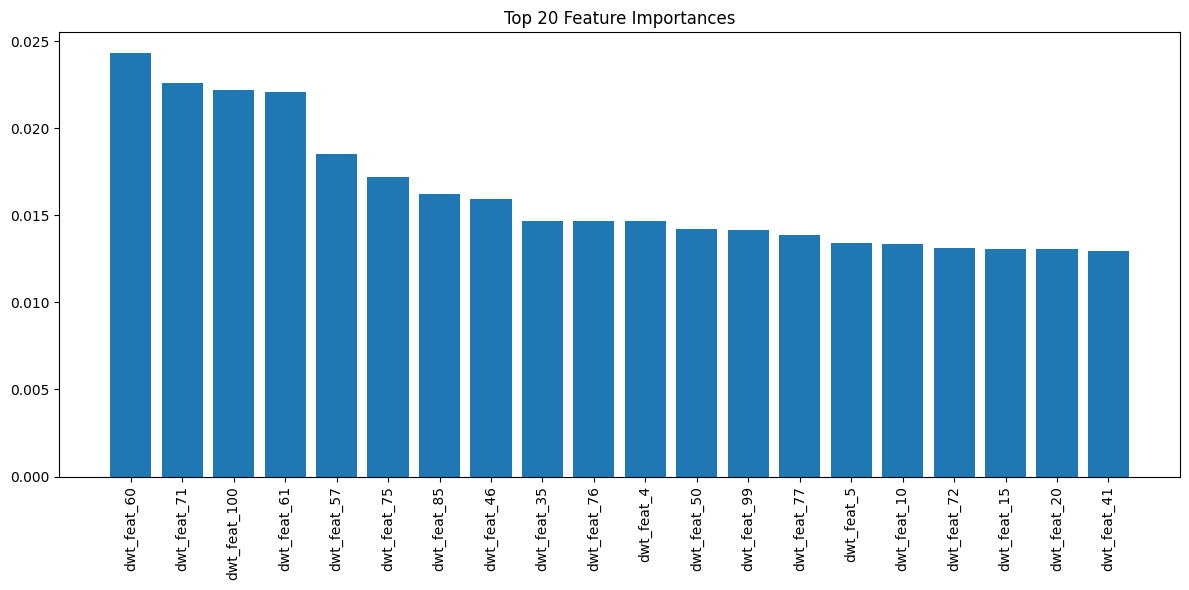

In [101]:
import matplotlib.pyplot as plt
import numpy as np

importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

top_n = 20  # top 20 features
plt.figure(figsize=(12, 6))
plt.title("Top 20 Feature Importances")
plt.bar(range(top_n), importances[indices][:top_n], align='center')
plt.xticks(range(top_n), [X.columns[i] for i in indices[:top_n]], rotation=90)
plt.tight_layout()
plt.show()


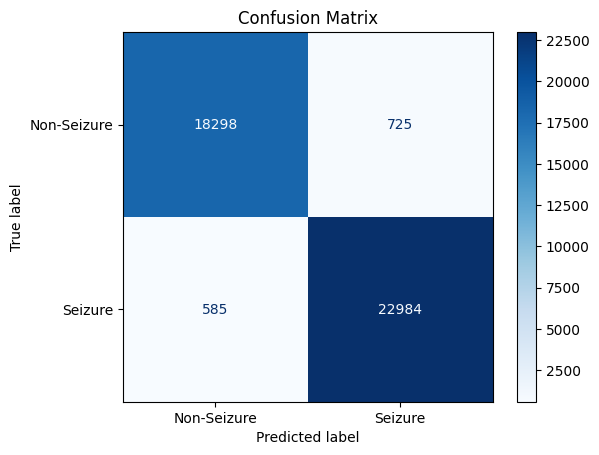

In [103]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Create display object with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Seizure', 'Seizure'])

# Plot confusion matrix with color map and values
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()


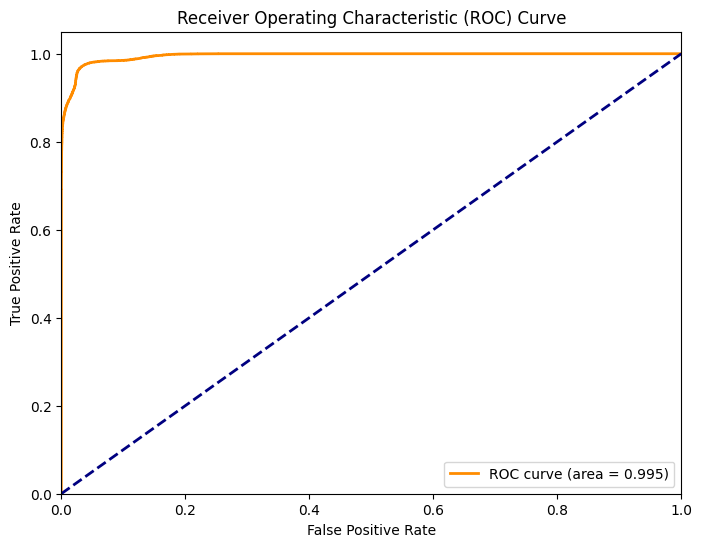

In [104]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


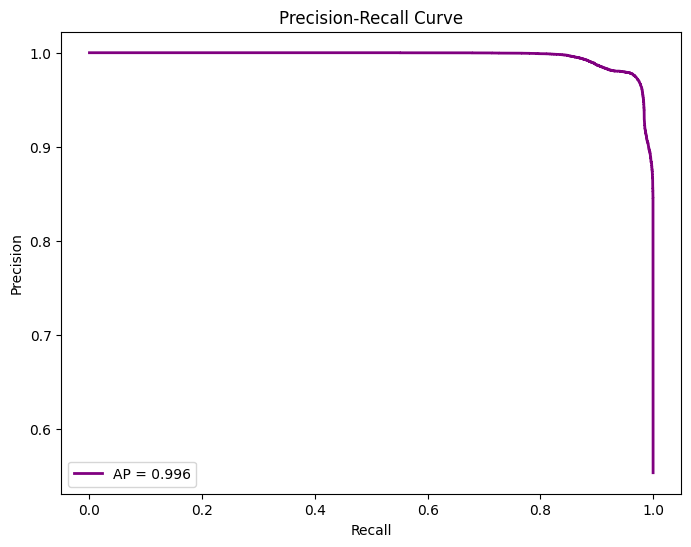

In [105]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='purple', lw=2, label=f'AP = {avg_precision:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


1	Data loading and extraction-->Loaded EEG epochs, extracted spectral & DWT features
2	Feature engineering-->Extracted delta, theta, alpha, beta bands + DWT energy features
3	Feature alignment-->Padded DWT features to consistent length, aligned with labels
4	Model training-->Trained Random Forest classifier
5	Hyperparameter tuning-->Used RandomizedSearchCV to optimize RF parameters
6	Model evaluation-->Classification report, ROC AUC score (~0.995)
7	Visualization-->Confusion matrix, ROC curve, Precision-Recall curve

In [107]:
from sklearn.impute import SimpleImputer

# Create imputer object to fill missing values with mean
imputer = SimpleImputer(strategy='mean')

# Fit imputer on training data and transform both train and test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['gender']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['gender']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
